Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import pandas as pd
import pickle
import joblib
import os

Importing dataset

In [ ]:
df = pd.read_csv("/content/loanapproval dataset.csv")


Viewing data

In [ ]:
print (df.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [ ]:
df.columns = df.columns.str.strip()


Data pre processing

Dropping irrevelant columns

In [ ]:
df.drop('loan_id', axis=1, inplace=True)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Handling null values and checking duplicate values

In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

Checking the datatypes of columns

In [ ]:
df.dtypes

,0
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64
luxury_assets_value,int64


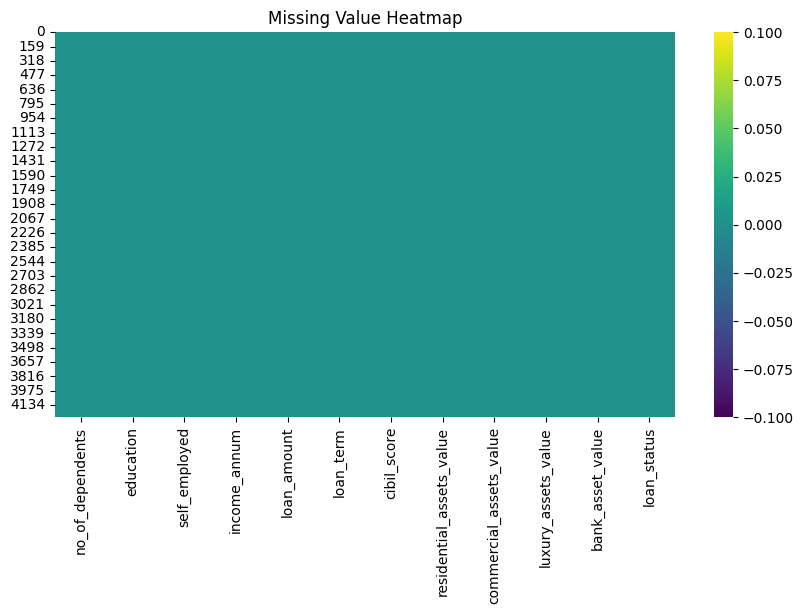

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()


Univariate Analysis (Individual Columns)
For numerical columns

Histogram + KDE:

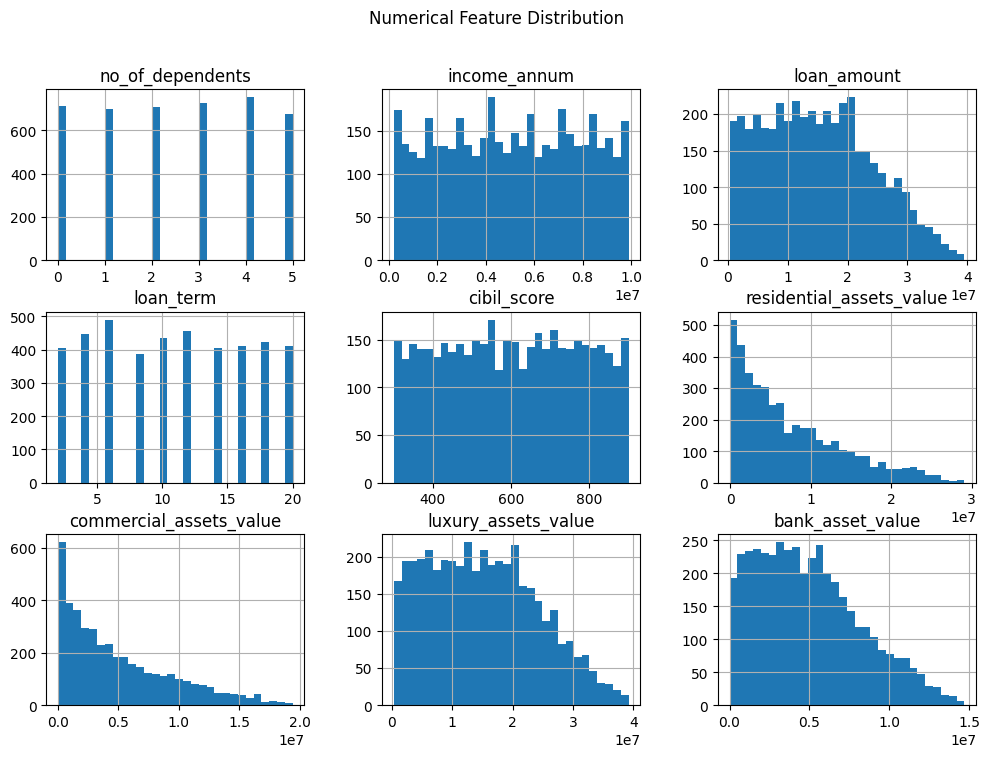

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(figsize=(12,8), bins=30)
plt.suptitle("Numerical Feature Distribution")
plt.show()


Boxplots (helps detect outliers):

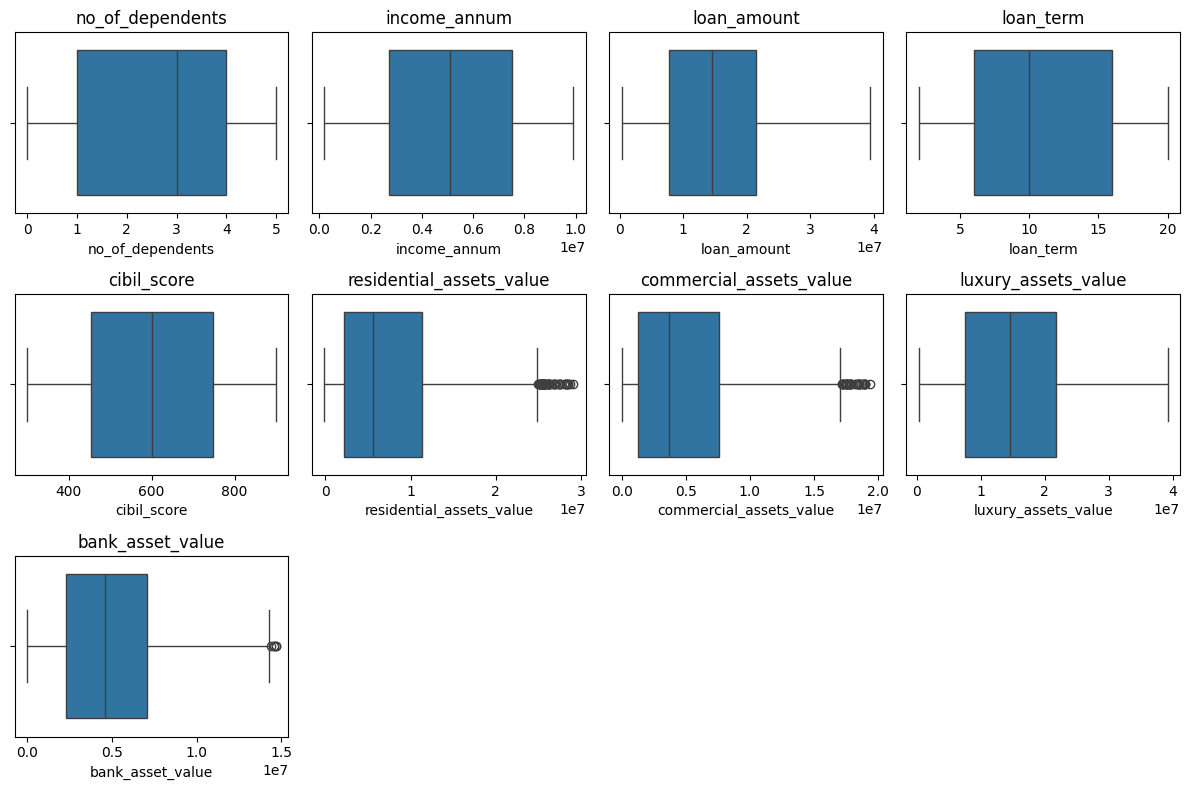

In [ ]:
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,4,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Countplot For categorical columns

/tmp/ipython-input-1839706489.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


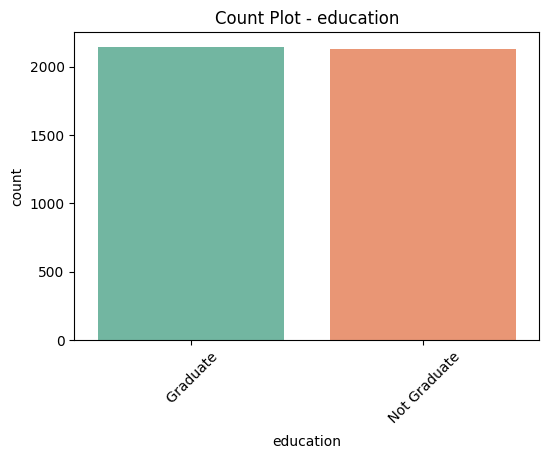

/tmp/ipython-input-1839706489.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


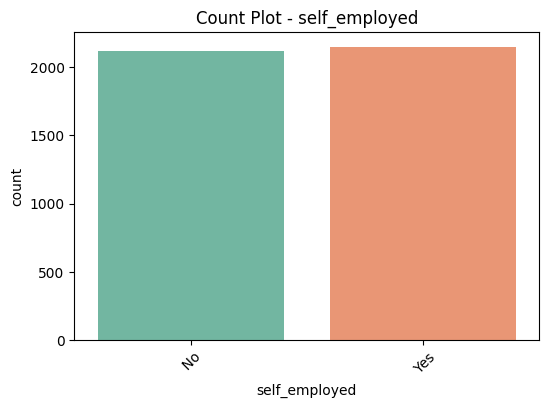

/tmp/ipython-input-1839706489.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


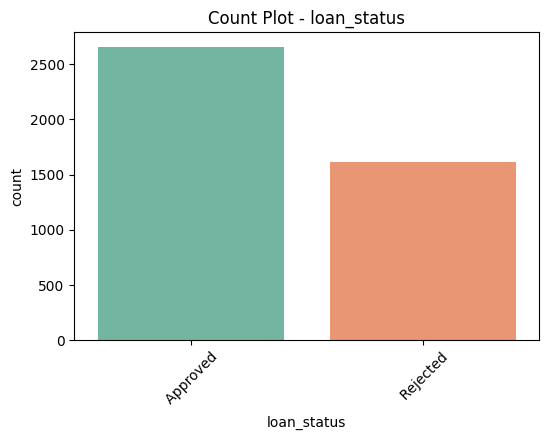

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Count Plot - {col}")
    plt.xticks(rotation=45)
    plt.show()


Bivariate analysis for target column

numerical vs target

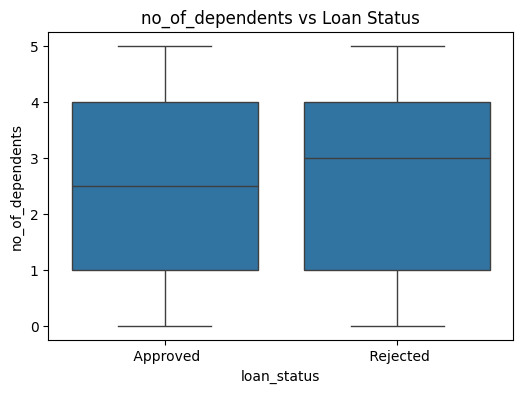

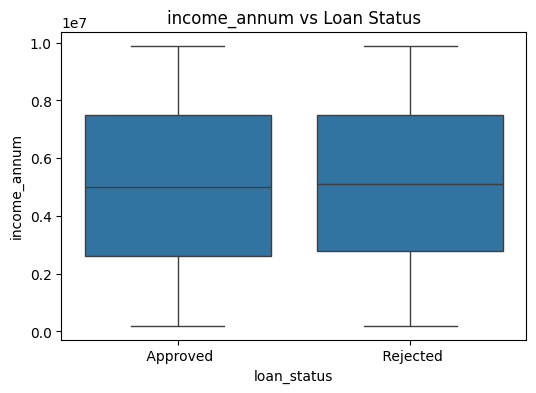

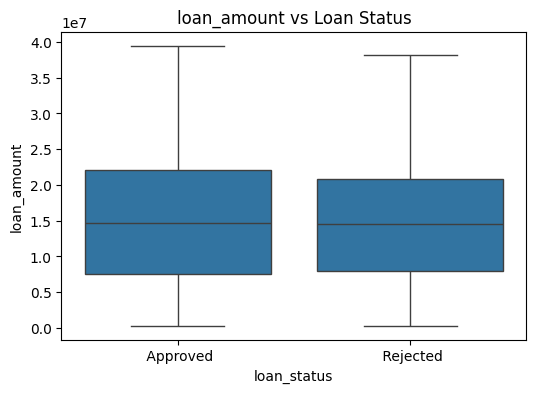

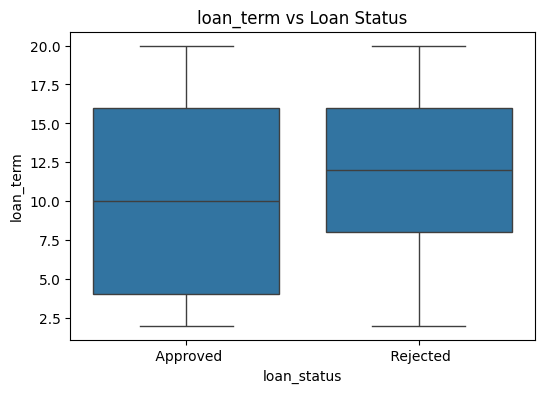

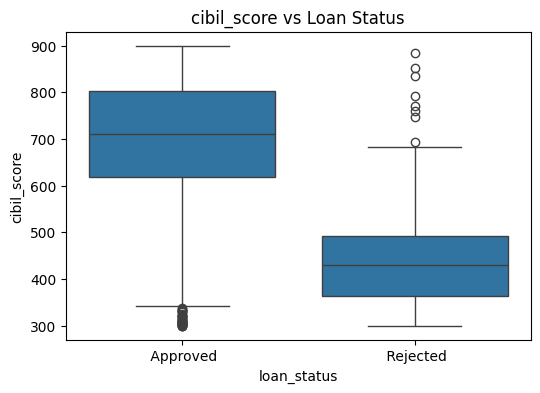

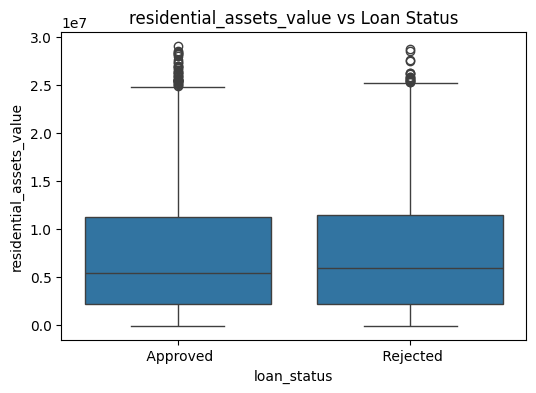

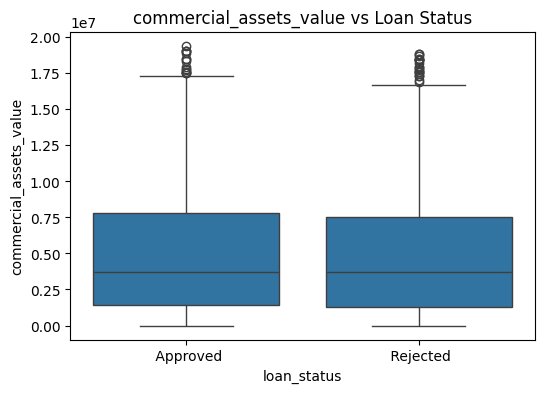

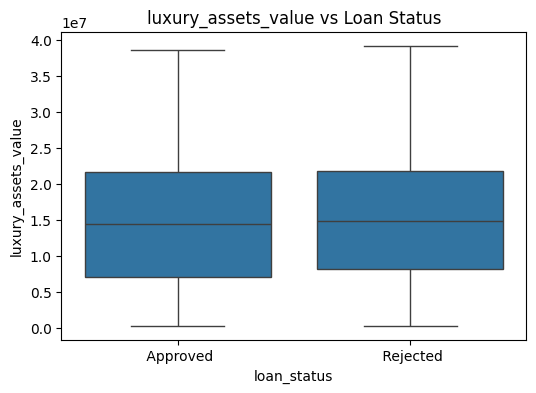

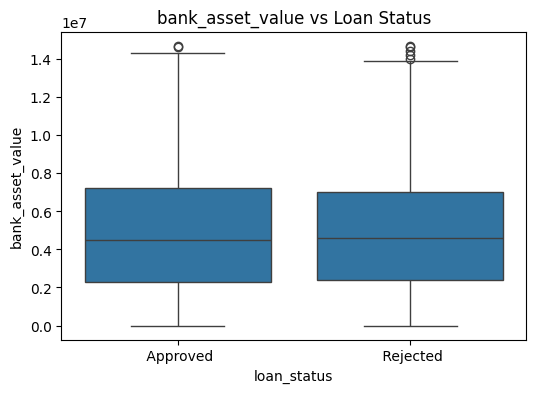

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['loan_status'], y=df[col])
    plt.title(f"{col} vs Loan Status")
    plt.show()

Categorial vs Target

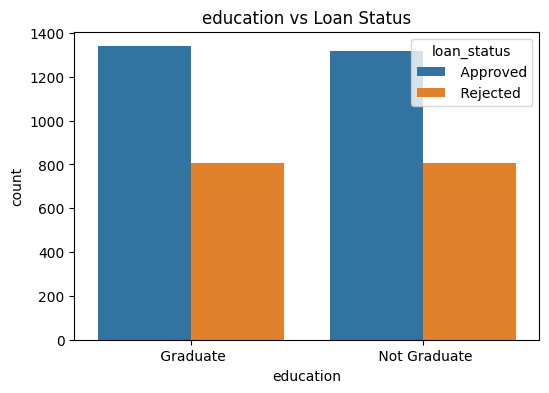

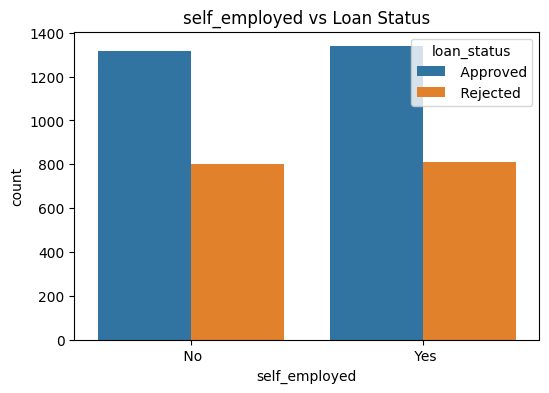

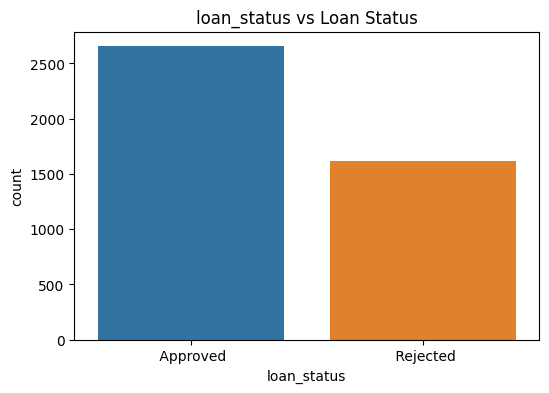

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], hue=df['loan_status'])
    plt.title(f"{col} vs Loan Status")
    plt.show()

Correlation Heatmap

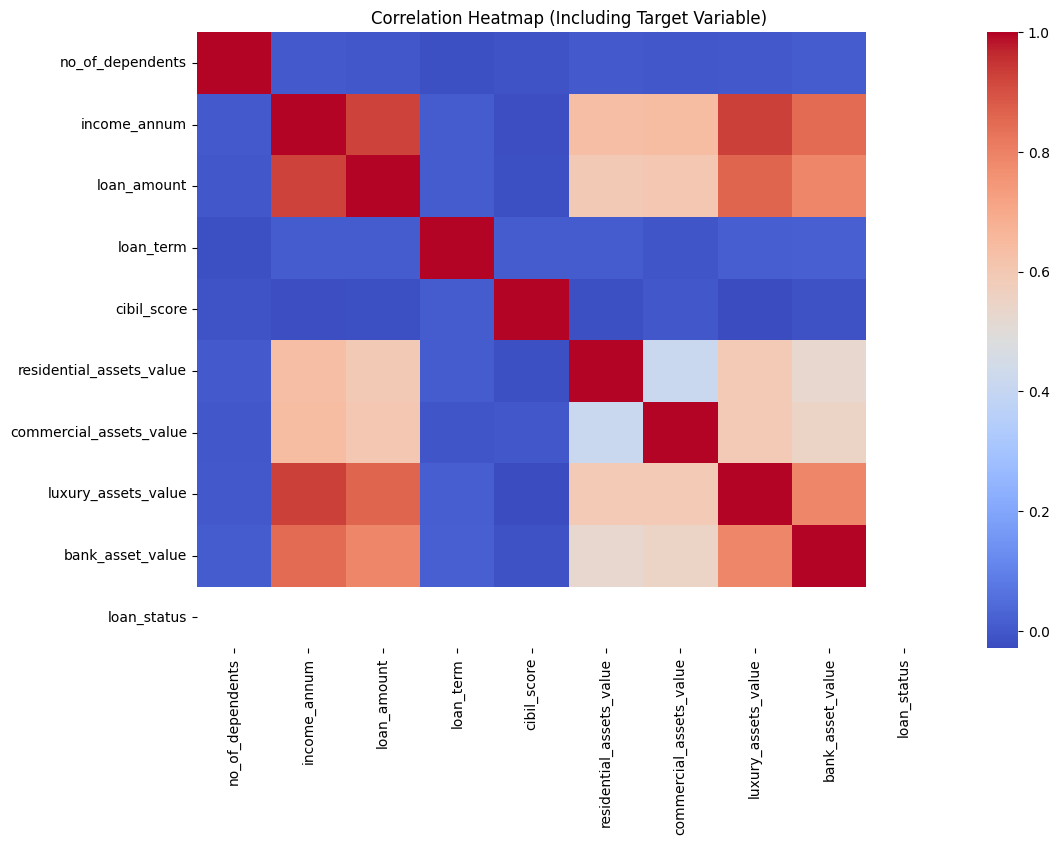

In [ ]:
plt.figure(figsize=(12,8))

# include target column for correlation
corr_matrix = df.copy()

# convert target to numeric if needed
if corr_matrix['loan_status'].dtype == 'object':
    corr_matrix['loan_status'] = corr_matrix['loan_status'].map({'Approved':1, 'Rejected':0})

# select only numeric columns including target
numeric_corr = corr_matrix.select_dtypes(include=np.number).corr()

# heatmap
sns.heatmap(numeric_corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (Including Target Variable)")
plt.show()

Pairplot

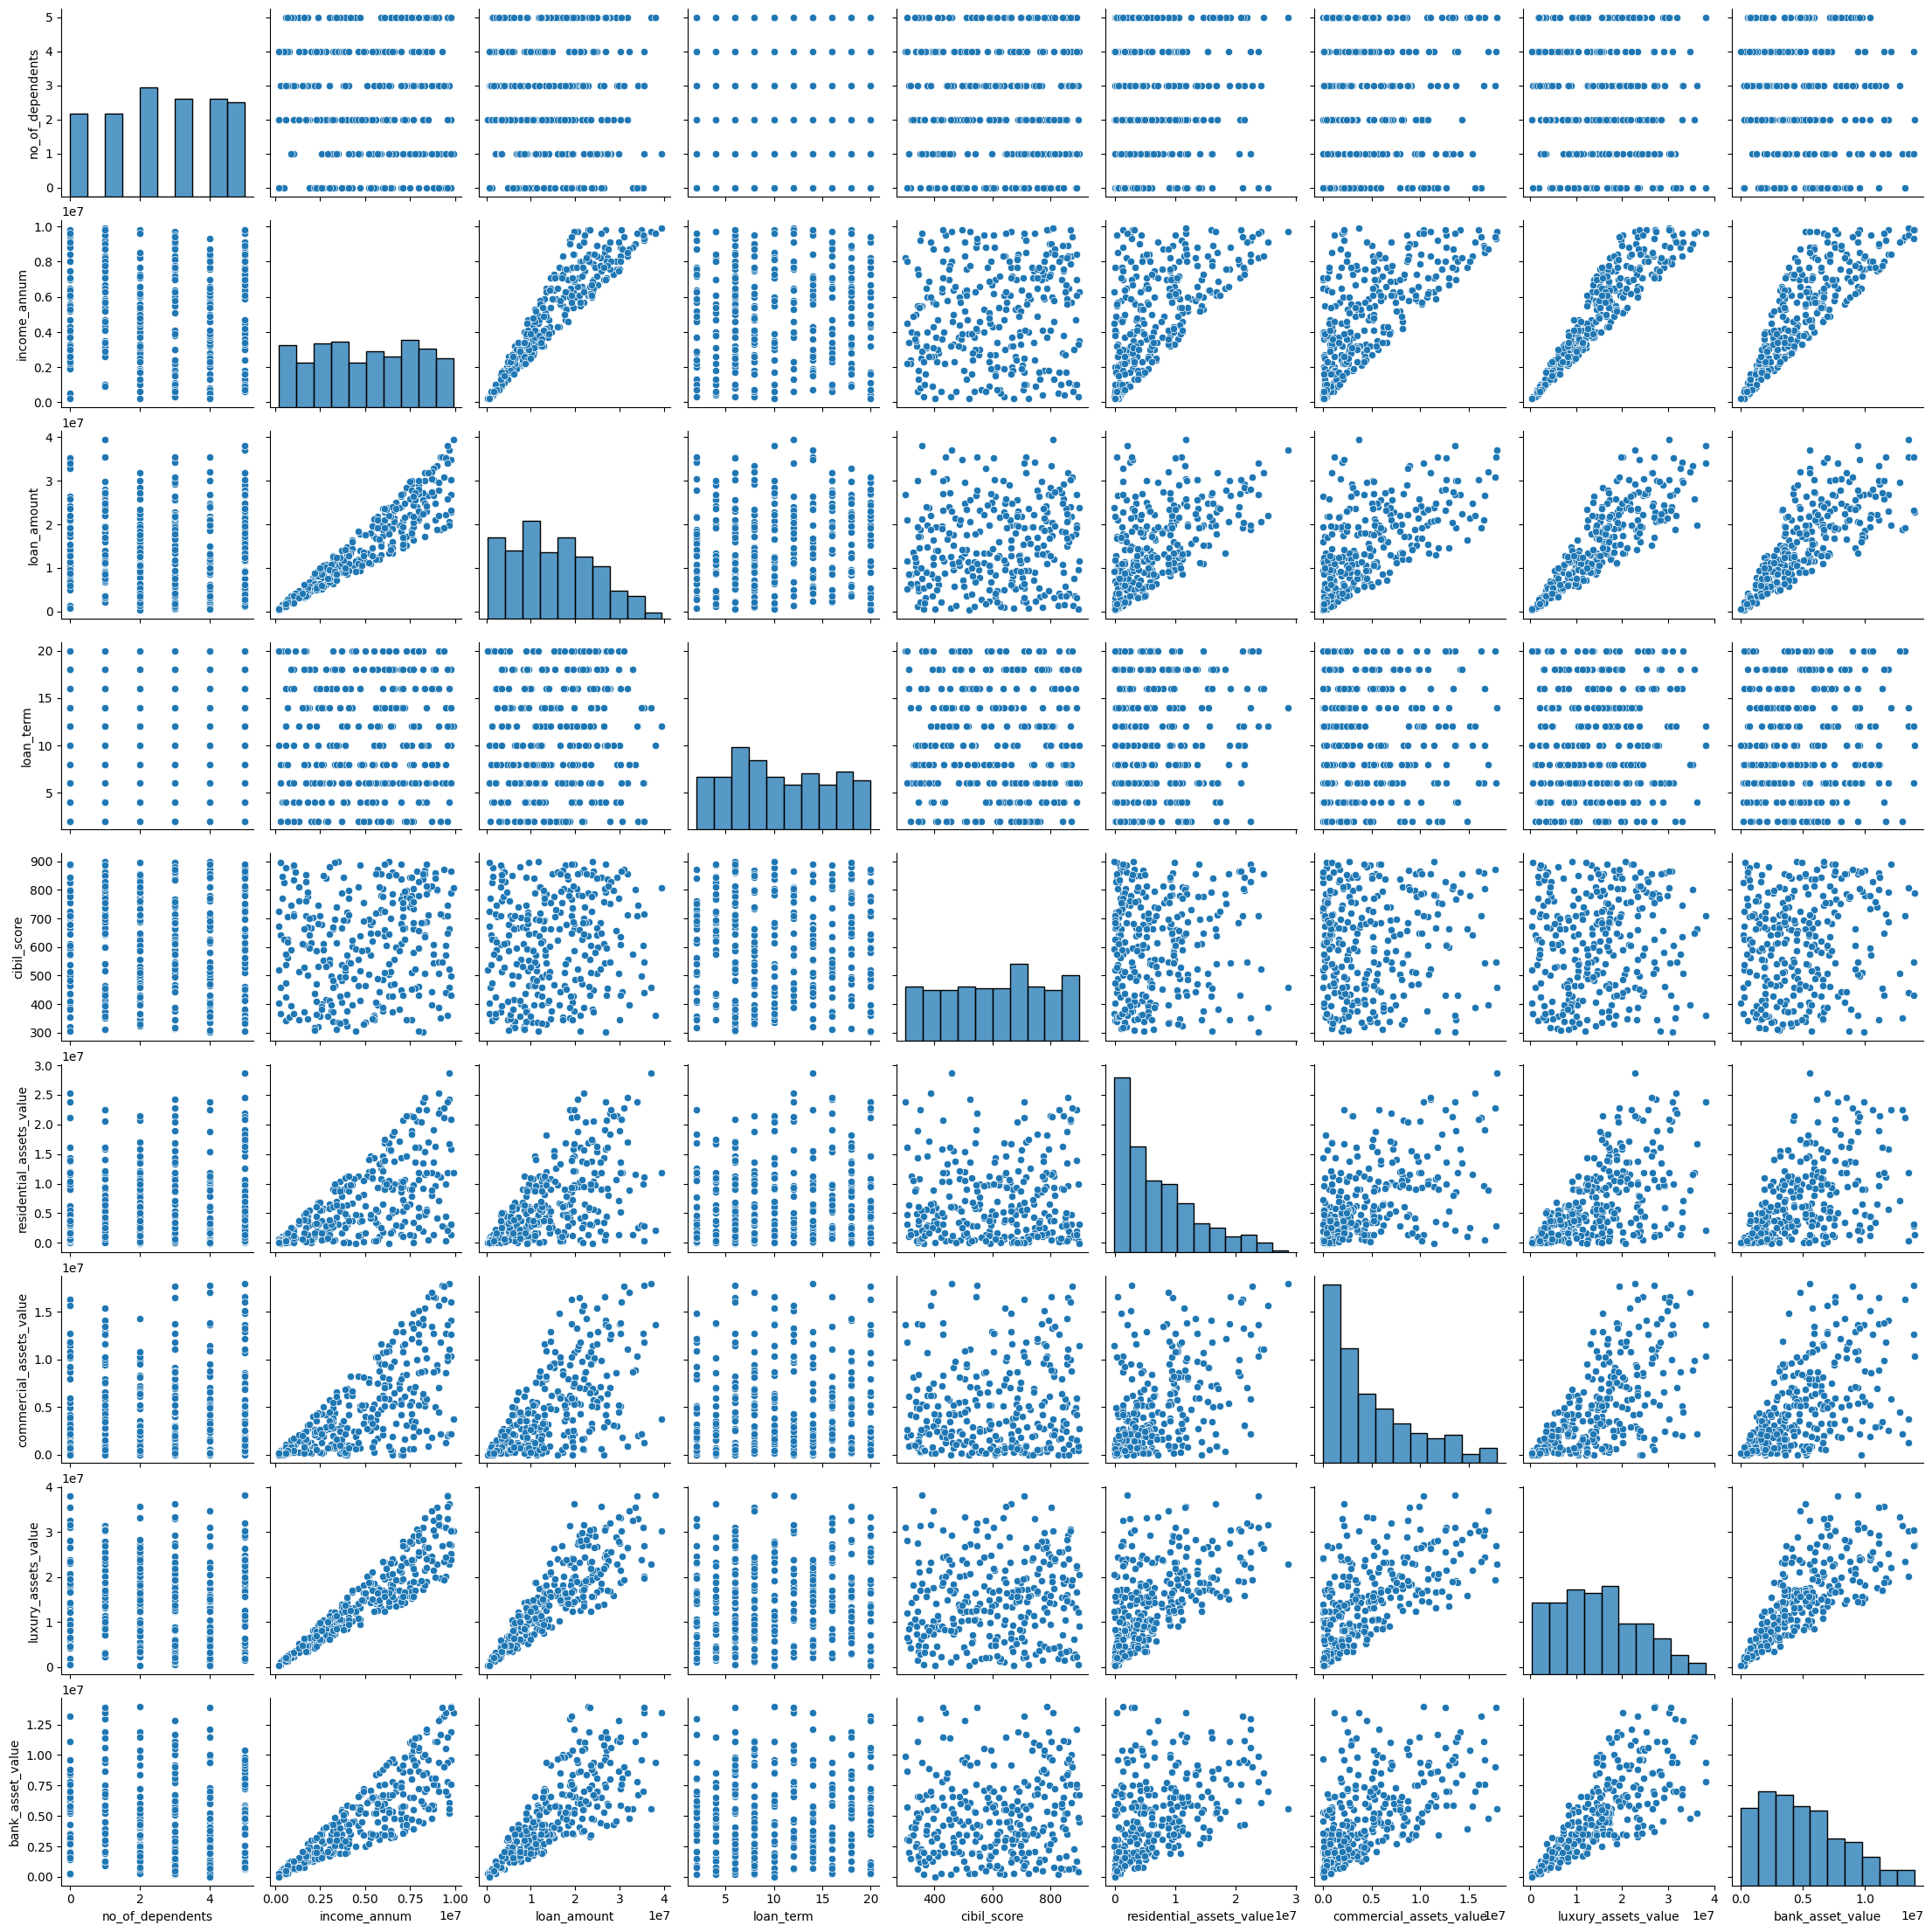

In [ ]:
sns.pairplot(df.select_dtypes(include=['int64', 'float64']).sample(300))
plt.show()


Outlier Detection
Z-Score Method

In [ ]:
from scipy import stats
import numpy as np

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
z_scores = np.abs(stats.zscore(df[num_cols]))
print((z_scores > 3).sum())

33


Target Distribution for cibil score

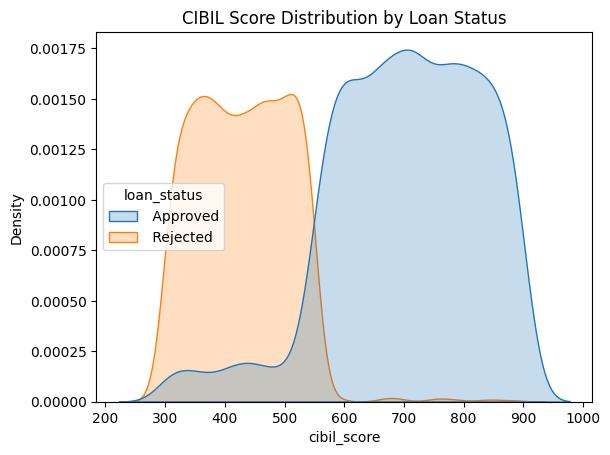

In [ ]:
sns.kdeplot(data=df, x='cibil_score', hue='loan_status', fill=True)
plt.title("CIBIL Score Distribution by Loan Status")
plt.show()


Target Distribution

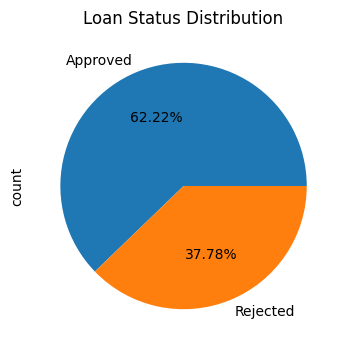

In [ ]:
plt.figure(figsize=(5,4))
df['loan_status'].value_counts().plot(kind='pie', autopct="%0.2f%%", labels=['Approved','Rejected'])
plt.title("Loan Status Distribution")
plt.show()

Outlier Analysis for key Financial columns

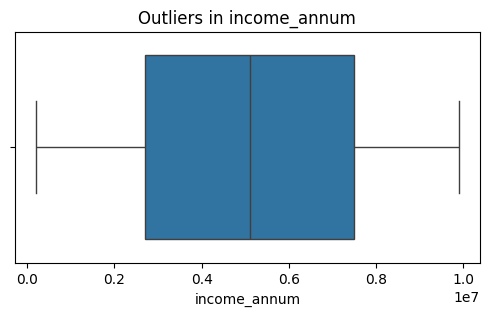

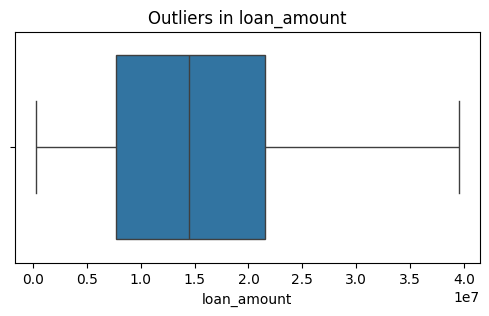

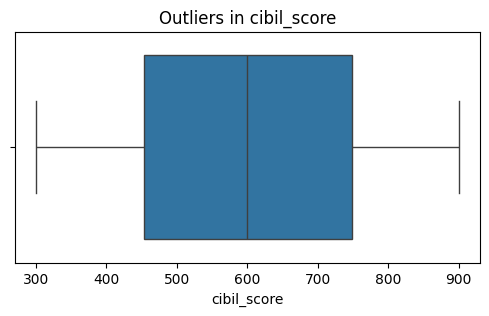

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

important_cols = ['income_annum', 'loan_amount', 'cibil_score']

for col in important_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


In [ ]:
df['education'] = df['education'].replace({'Graduate' : 1 , 'Not Graduate' : 0})
df['self_employed'] = df['self_employed'].replace({'No': 0 , 'Yes':1})
df['loan_status'] = df['loan_status'].replace({'Approved' : 1, 'Rejected' : 0})

In [ ]:
df.dtypes

,0
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64
luxury_assets_value,int64


Statistical analysis of data

In [ ]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


Checking target column

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


Checking highly correlated columns

In [ ]:
corr_matrix = df.select_dtypes(include=np.number).corr()
threshold = 0.95


high_corr_columns = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_columns.add(corr_matrix.columns[i])
            high_corr_columns.add(corr_matrix.columns[j])

high_corr_columns = list(high_corr_columns)
print("Highly correlated columns:", high_corr_columns)


Highly correlated columns: []


No columns are highly correlated

Spiltting the data into dependent and independent features

In [ ]:
df.shape

(4269, 12)

In [ ]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']

print(x.shape)
print(y.shape)

(4269, 11)
(4269,)


In [ ]:

df.columns = df.columns.str.strip()


x = df.drop("loan_status", axis=1).copy()
y = df["loan_status"]


x = x.apply(pd.to_numeric, errors='coerce')


print(x.dtypes)


no_of_dependents              int64
education                   float64
self_employed               float64
income_annum                  int64
loan_amount                   int64
loan_term                     int64
cibil_score                   int64
residential_assets_value      int64
commercial_assets_value       int64
luxury_assets_value           int64
bank_asset_value              int64
dtype: object


In [ ]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


/tmp/ipython-input-1718083031.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df['education'] = df['education'].replace({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].replace({'No': 0, 'Yes': 1})
df['loan_status'] = df['loan_status'].replace({'Approved': 1, 'Rejected': 0})


/tmp/ipython-input-1819356356.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace({'Graduate': 1, 'Not Graduate': 0})
/tmp/ipython-input-1819356356.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['self_employed'] = df['self_employed'].replace({'No': 0, 'Yes': 1})
/tmp/ipython-input-1819356356.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 

In [ ]:
print(df.dtypes)
print(df.head())


no_of_dependents            int64
education                   int64
self_employed               int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
dtype: object
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          1              0       9600000     29900000   
1                 0          0              1       4100000     12200000   
2                 3          1              0       9100000     29700000   
3                 3          1              0       8200000     30700000   
4                 5          0              1       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                

Scaling the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

x = df.drop('loan_status', axis=1)
y = df['loan_status']

scaler = StandardScaler()
x_scaled_data = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled_data, columns=x.columns)

class_distribution = y.value_counts(normalize=True)
correlation_with_target = x_scaled_df.corrwith(y)

class_distribution, correlation_with_target.sort_values(ascending=False).head(10)

(loan_status
 1    0.62216
 0    0.37784
 Name: proportion, dtype: float64,
 cibil_score                 0.770518
 loan_amount                 0.016150
 commercial_assets_value     0.008246
 education                   0.004918
 self_employed               0.000345
 bank_asset_value           -0.006778
 residential_assets_value   -0.014367
 income_annum               -0.015189
 luxury_assets_value        -0.015465
 no_of_dependents           -0.018114
 dtype: float64)

In [ ]:
x_scaled_df.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,4.993273e-17,-4.077840e-17,-6.324812e-17,1.681069e-16,7.323467e-17,-9.736882e-17,2.629790e-16,3.828176e-17,-1.664424e-18,-5.908706e-17,4.993273e-17
std,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00
min,-1.473548e+00,-1.004461e+00,-1.007288e+00,-1.731375e+00,-1.640450e+00,-1.559151e+00,-1.739665e+00,-1.164503e+00,-1.133237e+00,-1.628783e+00,-1.531382e+00
25%,-8.838247e-01,-1.004461e+00,-1.007288e+00,-8.405896e-01,-8.220748e-01,-8.584443e-01,-8.522468e-01,-8.108132e-01,-8.370048e-01,-8.378082e-01,-8.236472e-01
50%,2.956212e-01,9.955592e-01,9.927645e-01,1.456473e-02,-7.005410e-02,-1.577371e-01,3.709143e-04,-2.879675e-01,-2.901149e-01,-5.781874e-02,-1.159123e-01
75%,8.853442e-01,9.955592e-01,9.927645e-01,8.697190e-01,7.040849e-01,8.933237e-01,8.587888e-01,5.885679e-01,5.985812e-01,7.221707e-01,6.533647e-01
max,1.475067e+00,9.955592e-01,9.927645e-01,1.724873e+00,2.694728e+00,1.594031e+00,1.740407e+00,3.325819e+00,3.287456e+00,2.644680e+00,2.991967e+00


In [ ]:
x_scaled_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.294102,0.995559,-1.007288,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304
1,-1.473548,-1.004461,0.992765,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936
2,0.295621,0.995559,-1.007288,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316
3,0.295621,0.995559,-1.007288,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533
4,1.475067,-1.004461,0.992765,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172


In [ ]:
y.head()

,loan_status
0,1
1,0
2,0
3,0
4,0


In [ ]:
y.value_counts()

,count
loan_status,
1,2656
0,1613


Splitting the data into train and test data

In [ ]:
x_train ,x_test,y_train ,y_test = train_test_split(x_scaled_df, y, test_size=0.3, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2988, 11)
(1281, 11)
(2988,)
(1281,)


Performing per sampler to balance the imbalanced data

In [ ]:
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train,y_train)
print(x_train.shape, y_train.shape)

(2988, 11) (2988,)


In [ ]:
print(x_train_resampled.shape, y_train_resampled.shape)

(3692, 11) (3692,)


In [ ]:
y_train.value_counts()

,count
loan_status,
1,1846
0,1142


In [ ]:
y_train_resampled.value_counts()

,count
loan_status,
0,1846
1,1846


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train_resampled, y_train_resampled)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_resampled, y_train_resampled)

# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train_resampled, y_train_resampled)

# AdaBoost Clasiifier
adab = AdaBoostClassifier(n_estimators=100)
adab.fit(x_train_resampled,y_train_resampled)

# kNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_resampled,y_train_resampled)

# Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(x_train_resampled, y_train_resampled)

# Bagging Classifier (using Random Forest as base)
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)
bagging_clf.fit(x_train_resampled, y_train_resampled)

print("Model Building Completed")


Model Building Completed


Generating predictions for all classification models.

In [ ]:
ypred_logreg = log_reg.predict(x_test)
ypred_dt = dt.predict(x_test)
ypred_rf_clf = rf_clf.predict(x_test)
ypred_adab = adab.predict(x_test)
ypred_knn = knn.predict(x_test)
ypred_gb_clf = gb_clf.predict(x_test)
ypred_bg_rf = bagging_clf.predict(x_test)

Evaluation of models

In [ ]:
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

results = {
    "Model": ["Logistic Regression", "Decision Tree Classifier", "Random Forest", "AdaBoost Classifier", "kNN Classifier", "Gradient Boosting", "Bagging Classifier (using Random Forest Classifier)"],
    "Accuracy": [evaluate_model(y_test, ypred_logreg)[0],
                 evaluate_model(y_test, ypred_dt)[0],
                 evaluate_model(y_test, ypred_rf_clf)[0],
                 evaluate_model(y_test, ypred_adab)[0],
                 evaluate_model(y_test, ypred_knn)[0],
                 evaluate_model(y_test, ypred_gb_clf)[0],
                 evaluate_model(y_test, ypred_bg_rf)[0]],
    "Precision": [evaluate_model(y_test, ypred_logreg)[1],
                 evaluate_model(y_test, ypred_dt)[1],
                 evaluate_model(y_test, ypred_rf_clf)[1],
                 evaluate_model(y_test, ypred_adab)[1],
                 evaluate_model(y_test, ypred_knn)[1],
                 evaluate_model(y_test, ypred_gb_clf)[1],
                 evaluate_model(y_test, ypred_bg_rf)[1]],
    "Recall": [evaluate_model(y_test, ypred_logreg)[2],
                 evaluate_model(y_test, ypred_dt)[2],
                 evaluate_model(y_test, ypred_rf_clf)[2],
                 evaluate_model(y_test, ypred_adab)[2],
                 evaluate_model(y_test, ypred_knn)[2],
                 evaluate_model(y_test, ypred_gb_clf)[2],
                 evaluate_model(y_test, ypred_bg_rf)[2]],
    "F1 Score": [evaluate_model(y_test, ypred_logreg)[3],
                 evaluate_model(y_test, ypred_dt)[3],
                 evaluate_model(y_test, ypred_rf_clf)[3],
                 evaluate_model(y_test, ypred_adab)[3],
                 evaluate_model(y_test, ypred_knn)[3],
                 evaluate_model(y_test, ypred_gb_clf)[3],
                 evaluate_model(y_test, ypred_bg_rf)[3]]
}

results_df = pd.DataFrame(results)

results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.905543,0.951507,0.896296,0.923077
1,Decision Tree Classifier,0.977361,0.982695,0.981481,0.982088
2,Random Forest,0.978923,0.981550,0.985185,0.983364
3,AdaBoost Classifier,0.965652,0.976368,0.969136,0.972739
4,kNN Classifier,0.861827,0.938974,0.835802,0.884389
5,Gradient Boosting,0.975800,0.981459,0.980247,0.980852
6,Bagging Classifier (using Random Forest Classi...,0.975020,0.987469,0.972840,0.980100


Training and testing scores of all models

In [ ]:
models = ["Logistic Regression", "Decision Tree Classifier", "Random Forest",
               "AdaBoost Classifier", "kNN Classifier", "Gradient Boosting",
               "Bagging Classifier (using Random Forest as base)"]

training_scores = [log_reg.score(x_train_resampled,y_train_resampled), dt.score(x_train_resampled,y_train_resampled), rf_clf.score(x_train_resampled,y_train_resampled),
                    adab.score(x_train_resampled,y_train_resampled), knn.score(x_train_resampled,y_train_resampled), gb_clf.score(x_train_resampled,y_train_resampled), bagging_clf.score(x_train_resampled,y_train_resampled)]
testing_scores = [log_reg.score(x_test,y_test), dt.score(x_test,y_test), rf_clf.score(x_test,y_test),
                   adab.score(x_test,y_test), knn.score(x_test,y_test), gb_clf.score(x_test,y_test), bagging_clf.score(x_test,y_test)]


Model_Performance = pd.DataFrame({"Models": models, "Training Scores": training_scores, "Testing Scores": testing_scores})

Model_Performance

,Models,Training Scores,Testing Scores
0,Logistic Regression,0.934995,0.905543
1,Decision Tree Classifier,1.000000,0.977361
2,Random Forest,1.000000,0.978923
3,AdaBoost Classifier,0.981040,0.965652
4,kNN Classifier,0.946100,0.861827
5,Gradient Boosting,0.995125,0.975800
6,Bagging Classifier (using Random Forest as base),0.998917,0.975020


ROC-AUC Scores of all models

In [ ]:
def compute_roc_auc(model, x_test, y_test):

    y_prob = model.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    return auc_score

results = {'Model': [], 'ROC-AUC': []}


models = [log_reg, dt, rf_clf, adab, knn, gb_clf, bagging_clf]

for model in models:
    auc_score = compute_roc_auc(model, x_test, y_test)
    results['Model'].append(model.__class__.__name__)
    results['ROC-AUC'].append(auc_score)

roc_auc_scores = pd.DataFrame(results)

roc_auc_scores

,Model,ROC-AUC
0,LogisticRegression,0.963634
1,DecisionTreeClassifier,0.975879
2,RandomForestClassifier,0.998224
3,AdaBoostClassifier,0.995401
4,KNeighborsClassifier,0.942893
5,GradientBoostingClassifier,0.997539
6,BaggingClassifier,0.997741


## Conclusion:-
* **Rankings of the Algorithms based on their performances.**

            1. Random Forest:

            Accuracy: 0.978923
            Precision: 0.981550
            Recall: 0.985185
            F1 Score: 0.983364
            ROC-AUC: 0.998224
            Testing Score: 0.978923

            2. Bagging Classifier (using Random Forest as base):

            Accuracy: 0.975020
            Precision: 0.987469
            Recall: 0.972840
            F1 Score: 0.980100
            ROC-AUC: 0.997741
            Testing Score: 0.975020

            3. Gradient Boosting:

            Accuracy: 0.975800
            Precision: 0.981459
            Recall: 0.980247
            F1 Score: 0.980852
            ROC-AUC: 0.997539
            Testing Score: 0.975800

            4. Decision Tree Classifier:

            Accuracy: 0.977361
            Precision: 0.982695
            Recall: 0.981481
            F1 Score: 0.982088
            ROC-AUC: 0.975879
            Testing Score: 0.977361

            5. AdaBoost Classifier:

            Accuracy: 0.969555
            Precision: 0.975339
            Recall: 0.976543
            F1 Score: 0.975941
            ROC-AUC: 0.995427
            Testing Score: 0.969555

            6. Logistic Regression:

            Accuracy: 0.905543
            Precision: 0.951507
            Recall: 0.896296
            F1 Score: 0.923077
            ROC-AUC: 0.963634
            Testing Score: 0.905543

            7. kNN Classifier:

            Accuracy: 0.861827
            Precision: 0.938974
            Recall: 0.835802
            F1 Score: 0.884389
            ROC-AUC: 0.942893
            Testing Score: 0.861827
            

Visualizing 4 best models

/tmp/ipython-input-988609336.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


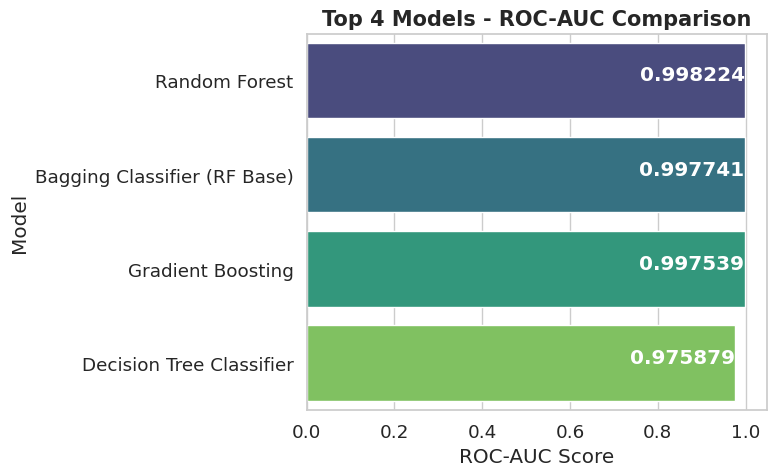

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = {
    'Model': [
        'Random Forest',
        'Bagging Classifier (RF Base)',
        'Gradient Boosting',
        'Decision Tree Classifier'
    ],
    'ROC-AUC': [0.998224, 0.997741, 0.997539, 0.975879]
}

df_top4 = pd.DataFrame(data)

sns.set(style='whitegrid', font_scale=1.2)


plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(
    x='ROC-AUC',
    y='Model',
    data=df_top4,
    palette='viridis'
)


for i, v in enumerate(df_top4['ROC-AUC']):
    plt.text(v - 0.0008, i, f'{v:.6f}', color='white', fontweight='bold', ha='right')


plt.title('Top 4 Models - ROC-AUC Comparison', fontsize=15, fontweight='bold')
plt.xlabel('ROC-AUC Score')
plt.ylabel('Model')


plt.tight_layout()
plt.show()



Explainable AI (XAI) for best 2 models

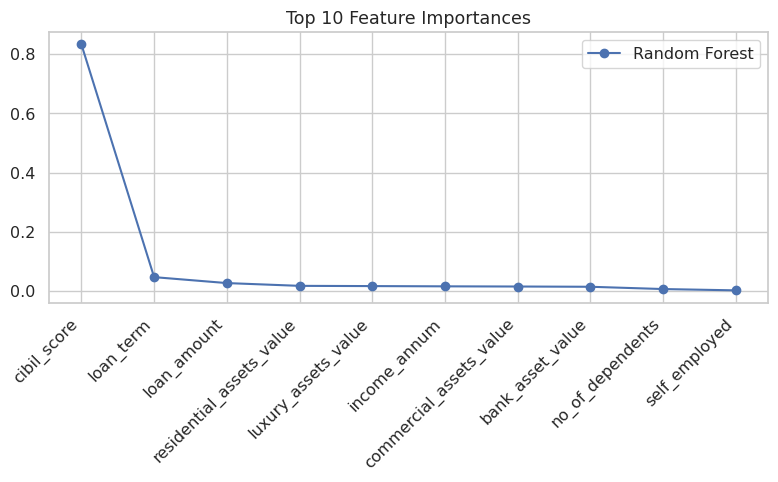

Calculating permutation importance for: Random Forest
Calculating permutation importance for: Bagging (RF base)


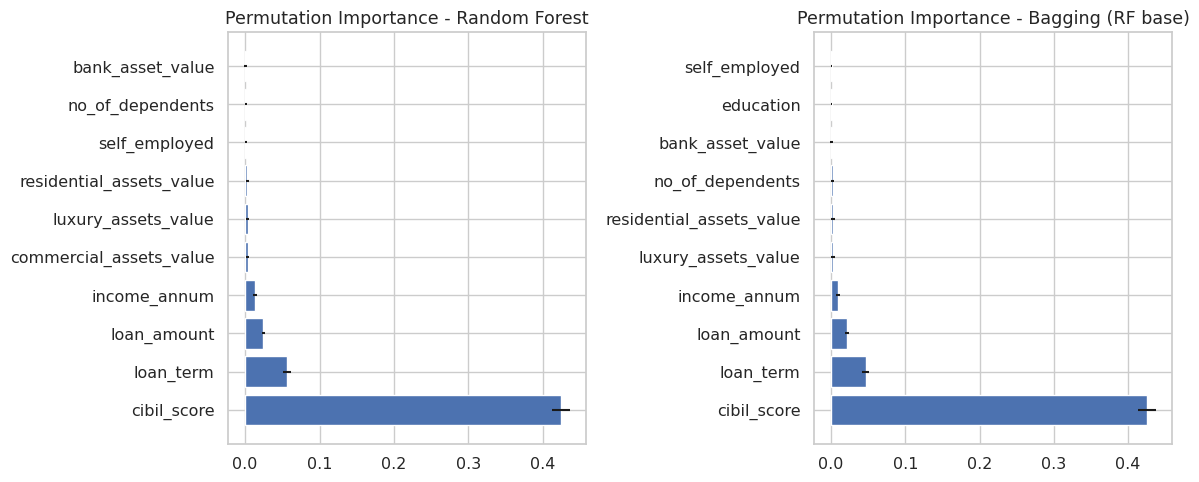

TreeExplainer not supported for Bagging (RF base), using KernelExplainer...
Generating SHAP values for Random Forest ...


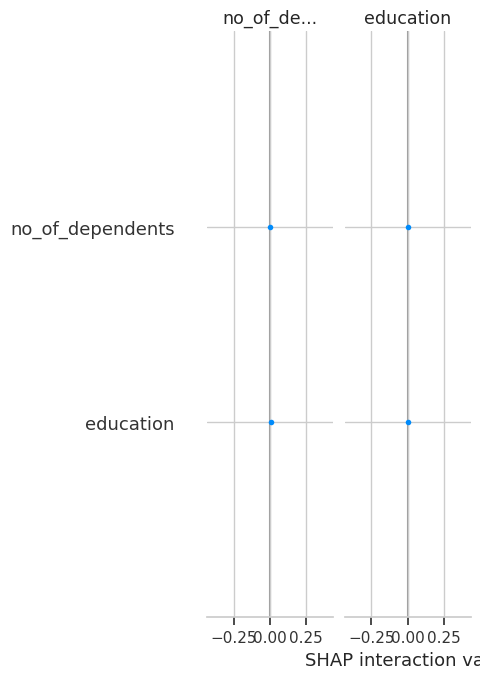

Generating SHAP values for Bagging (RF base) ...


  0%|          | 0/1 [00:00<?, ?it/s]

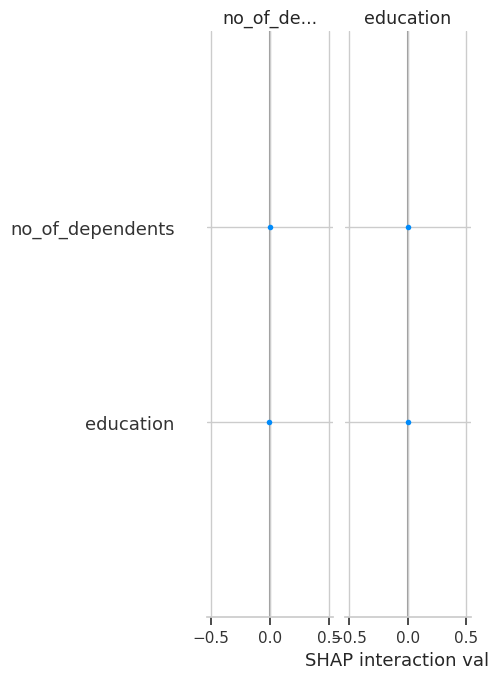

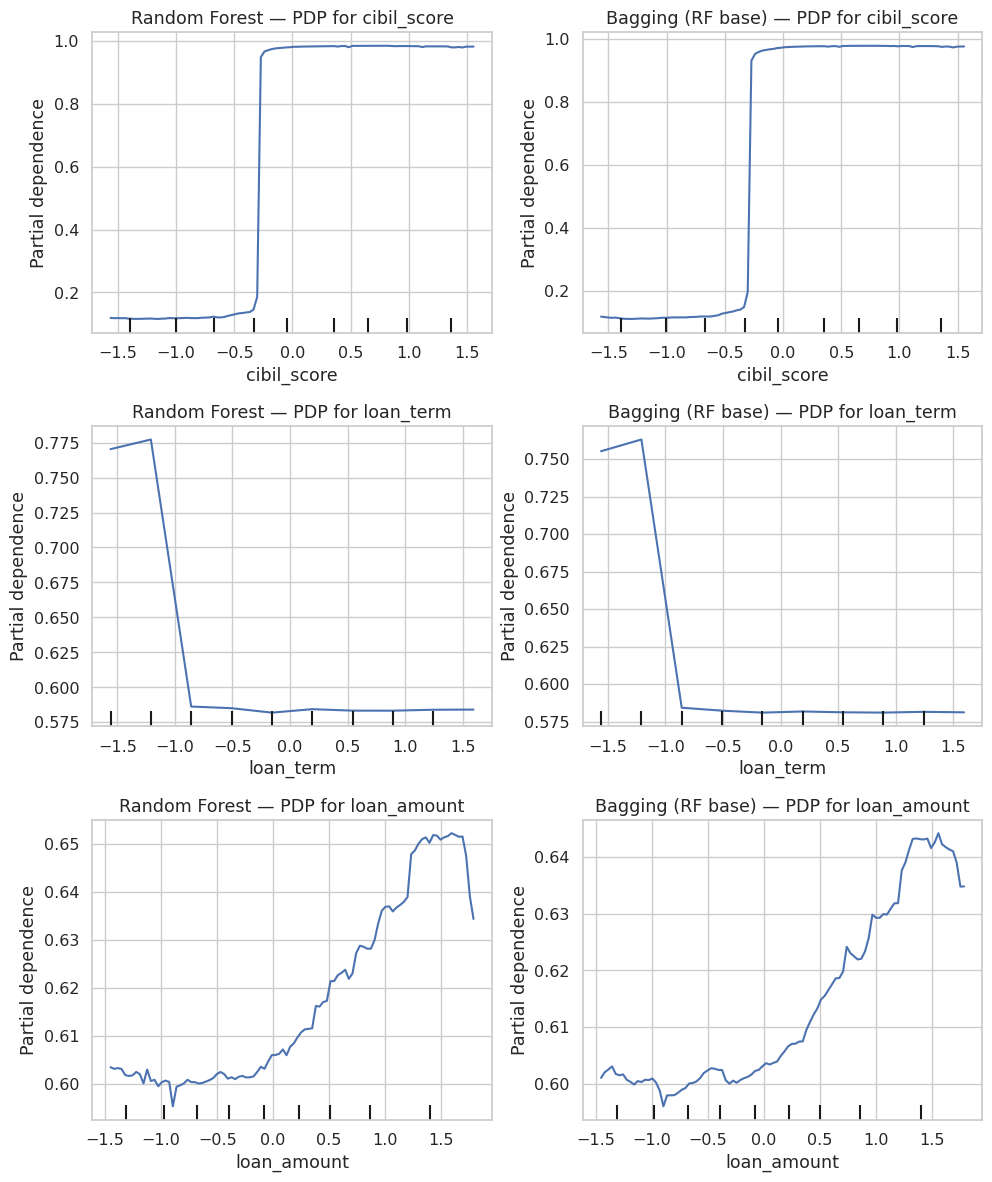

✅ XAI completed for top 2 models: Random Forest and Bagging Classifier.


In [ ]:
# Explainable AI (XAI) for top 2 models: Random Forest and Bagging Classifier

import shap
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import numpy as np
import pandas as pd
import seaborn as sns

# Models dictionary
models_dict = {
    "Random Forest": rf_clf,
    "Bagging (RF base)": bagging_clf
}

# Feature names setup
if isinstance(x_train, pd.DataFrame):
    feature_names = list(x_train.columns)
else:
    feature_names = [f"f{i}" for i in range(x_train.shape[1])]
    x_train = pd.DataFrame(x_train, columns=feature_names)
    x_test = pd.DataFrame(x_test, columns=feature_names)

sns.set(style="whitegrid", font_scale=1.05)

# ========== 1) Feature Importances ==========
plt.figure(figsize=(8, 5))
for name, model in models_dict.items():
    if hasattr(model, "feature_importances_"):
        vals = model.feature_importances_
        df = pd.DataFrame({"Feature": feature_names, "Importance": vals})
        df = df.sort_values("Importance", ascending=False).head(10)
        plt.plot(range(10), df["Importance"], marker='o', label=name)
plt.xticks(range(10), df["Feature"], rotation=45, ha='right')
plt.title("Top 10 Feature Importances")
plt.legend()
plt.tight_layout()
plt.show()

# ========== 2) Permutation Importance ==========
perm_results = {}
for name, model in models_dict.items():
    print(f"Calculating permutation importance for: {name}")
    result = permutation_importance(model, x_test, y_test, n_repeats=20, random_state=42, n_jobs=-1)
    df = pd.DataFrame({
        "Feature": feature_names,
        "Mean Importance": result.importances_mean,
        "STD": result.importances_std
    }).sort_values("Mean Importance", ascending=False).head(10)
    perm_results[name] = df

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, (name, df) in zip(axes, perm_results.items()):
    ax.barh(df["Feature"], df["Mean Importance"], xerr=df["STD"])
    ax.set_title(f"Permutation Importance - {name}")
plt.tight_layout()
plt.show()

# ========== 3) SHAP Explanations ==========
shap.initjs()

shap_explainers = {}
for name, model in models_dict.items():
    try:
        expl = shap.TreeExplainer(model)
    except Exception:
        print(f"TreeExplainer not supported for {name}, using KernelExplainer...")
        background = shap.sample(x_train, 100, random_state=42)
        expl = shap.KernelExplainer(model.predict_proba, background)
    shap_explainers[name] = expl

# Sample for SHAP
# Sample for SHAP — just first test instance to speed up
sample_idx = [0]  # only the first instance
x_shap_sample = x_test.iloc[sample_idx]

for name, expl in shap_explainers.items():
    print(f"Generating SHAP values for {name} ...")
    try:
        sv = expl.shap_values(x_shap_sample)
        shap_vals = sv[1] if isinstance(sv, list) and len(sv) > 1 else sv
        shap.summary_plot(shap_vals, x_shap_sample, show=True)
    except Exception as e:
        print(f"SHAP failed for {name}: {e}")

# ========== 4) Partial Dependence Plots (PDP) ==========
top_features = list(perm_results["Random Forest"]["Feature"].head(3))
fig, axes = plt.subplots(len(top_features), len(models_dict), figsize=(5*len(models_dict), 4*len(top_features)))
for i, feat in enumerate(top_features):
    for j, (name, model) in enumerate(models_dict.items()):
        ax = axes[i, j] if len(top_features) > 1 else axes[j]
        PartialDependenceDisplay.from_estimator(model, x_test, [feat], ax=ax)
        ax.set_title(f"{name} — PDP for {feat}")
plt.tight_layout()
plt.show()

print("✅ XAI completed for top 2 models: Random Forest and Bagging Classifier.")


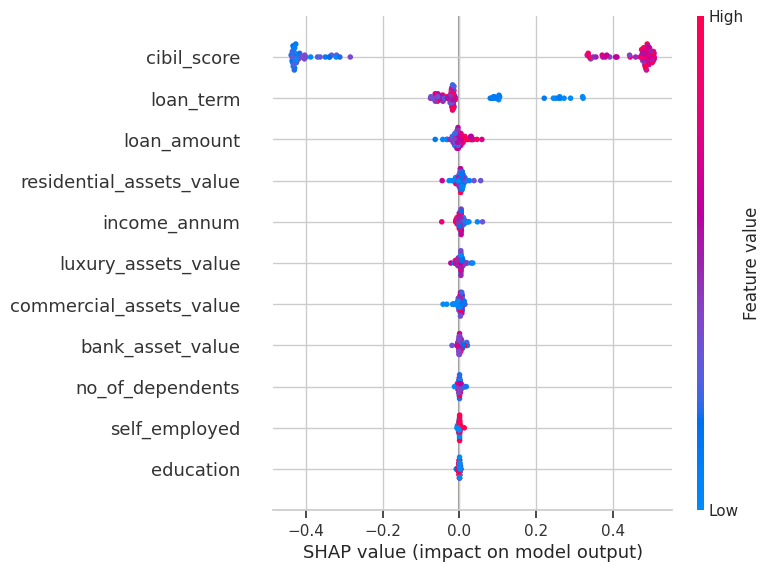

In [ ]:
import shap

# sample 100 rows
x_shap_sample = x_test.sample(100, random_state=42)


explainer = shap.TreeExplainer(rf_clf)


shap_values = explainer.shap_values(x_shap_sample)


sv = shap_values[:, :, 1]


shap.summary_plot(sv, x_shap_sample)
